### Hypothesis is Sharpe ratio of Equity weighted portfolios is greater than the market_cap weighted portfolios, let's check.
#### Market_cap weighted portfolios are may not optimized portfolios, due to below two reasons.
##### 1. Market cap weighted portfolios are baised towards large cap stocks.
##### 2. Market cap weighted portfolios are baised towards growth stocks, as they inclused high-priced stocks.


# Comparing EquallyWeighted and CapWeighted Portfolios

Load the EW and VW versions of the returns of the industry portfolios.

In [5]:
import numpy as np
import pandas as pd

import risk_kit_3 as rk

%load_ext autoreload
%autoreload 2

ind_cw = rk.get_ind_returns(ew=False)
ind_ew = rk.get_ind_returns(ew=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
sr = pd.DataFrame({"CW": rk.sharpe_ratio(ind_cw["1945":], 0.03, 12), "EW": rk.sharpe_ratio(ind_ew["1945":], 0.03, 12)})

<Axes: >

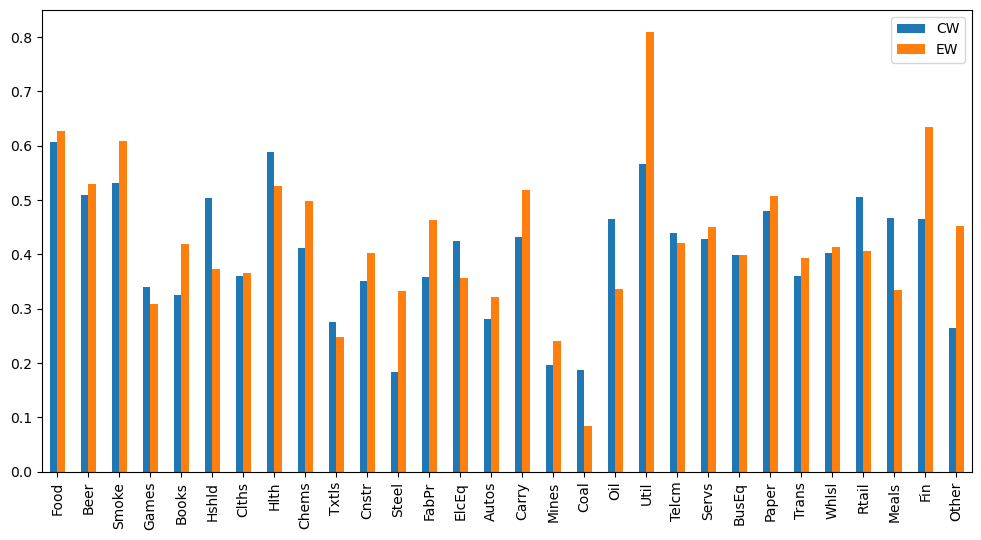

In [7]:
sr.plot.bar(figsize=(12, 6))

In [8]:
(sr["EW"] > sr["CW"]).sum()*100/sr.shape[0]

63.333333333333336

Text(0.5, 1.0, 'Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018')

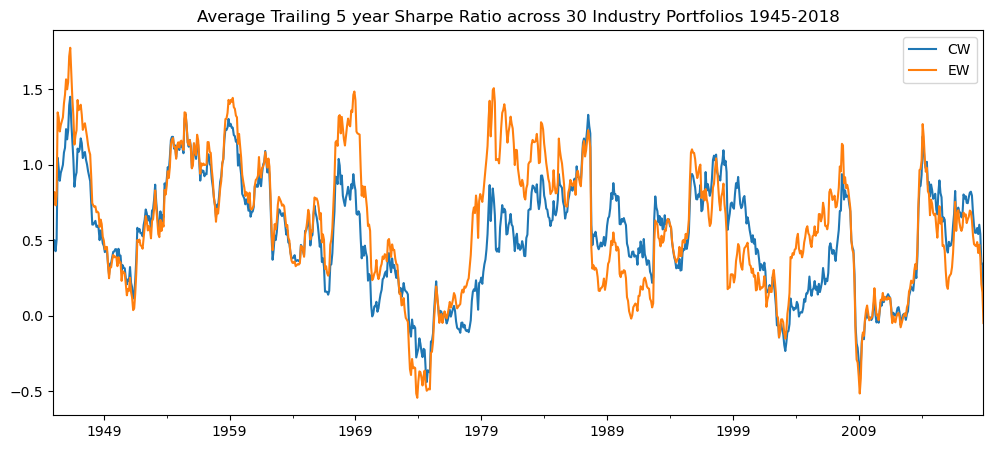

In [9]:
ax = ind_cw.rolling(60).apply(rk.sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}).mean(axis=1)["1945":].plot(figsize=(12,5), label="CW", legend=True)
ind_ew.rolling(60).apply(rk.sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}).mean(axis=1)["1945":].plot(ax=ax, label="EW", legend=True)
ax.set_title("Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018")

#### Results
#### Found out, out of 100%, 63% of the above industries portfolios shown equally weighted portfolio sharpe ratio greater than market weighted portfolio sharpe Ratio
#### Analyzed 60 days rolling period sharpe ratios for both equally weighted and market weighted industry portfolios.